# Practica nueve

Grupo 14:
* Joaquín Ibáñez Penalva
* Aurora Zuoris

Para la realización de esta práctica se usará la librería de numpy, pandas, matplotlib, y sklearn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_bin = pd.read_csv('spam_preprocesado_binario.csv')
data_real = pd.read_csv('spam_preprocesado_reales.csv')

data_bin.shape, data_real.shape

((5572, 501), (5572, 501))

## Ejercicio uno

In [3]:
from sklearn.model_selection import train_test_split

X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(data_bin.drop('v1', axis=1), data_bin['v1'], test_size=0.2, random_state=42)
X_train_real, X_test_real, y_train_real, y_test_real = train_test_split(data_real.drop('v1', axis=1), data_real['v1'], test_size=0.2, random_state=42)

X_train_bin.shape, X_test_bin.shape, y_train_bin.shape, y_test_bin.shape

((4457, 500), (1115, 500), (4457,), (1115,))

In [10]:
data_bin['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

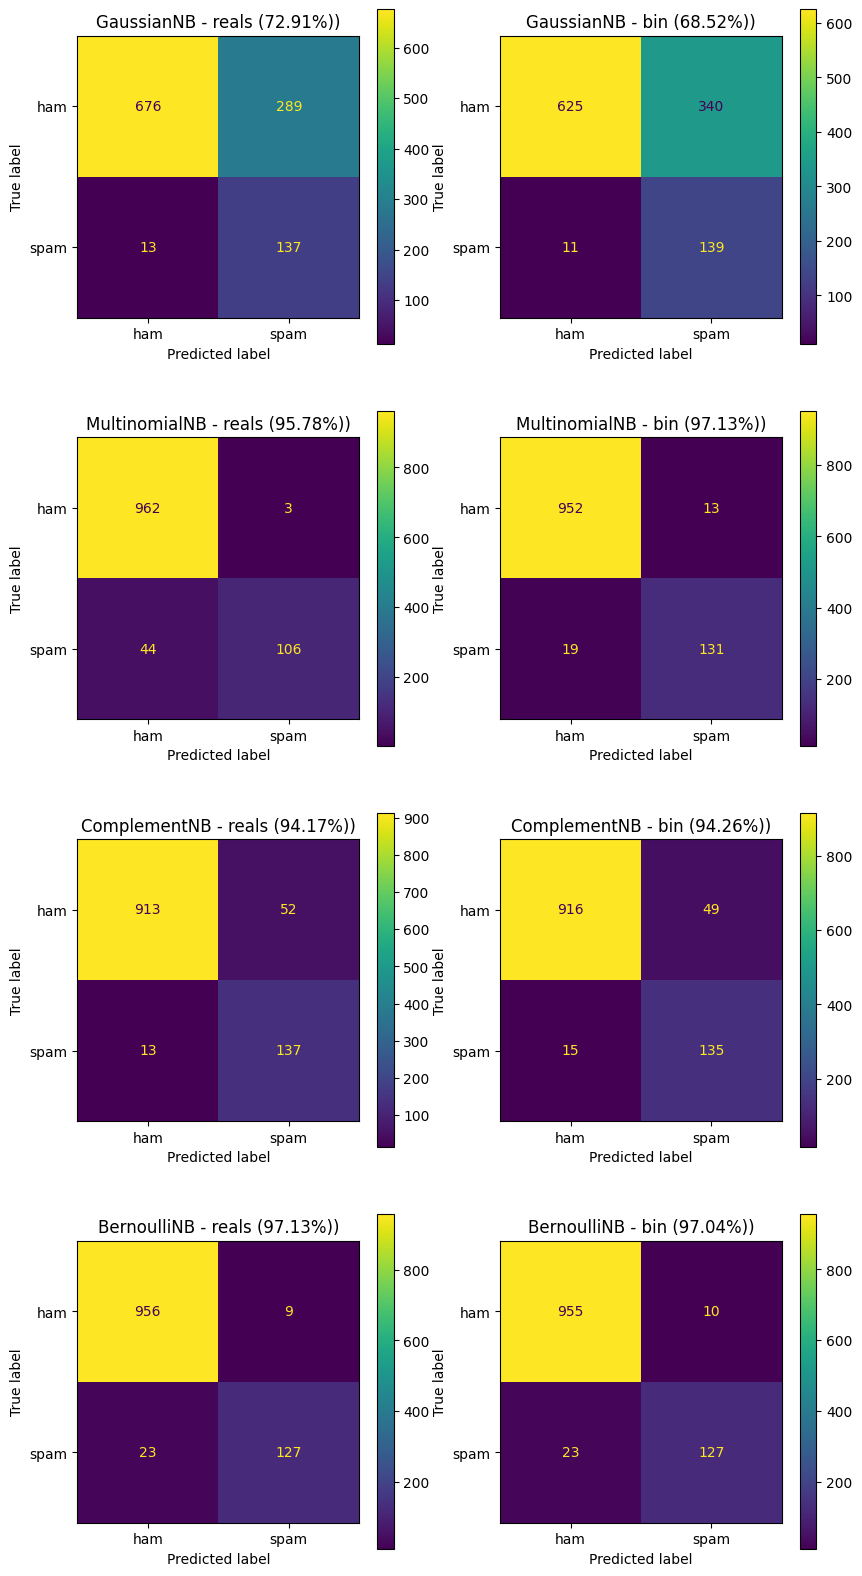

In [12]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

fig, axs = plt.subplots(4, 2, figsize=(10, 20))

models = [
    GaussianNB(),
    MultinomialNB(),
    ComplementNB(),
    BernoulliNB()
]

for i, model in enumerate(models):
    model.fit(X_train_real, y_train_real)
    p = model.predict(X_test_real)
    s = accuracy_score(y_test_real, p)
    c = confusion_matrix(y_test_real, p)
    ConfusionMatrixDisplay(c, display_labels=['ham', 'spam']).plot(ax=axs[i, 0])
    axs[i, 0].set_title(f'{model.__class__.__name__} - reals ({s:.2%}))')

    model.fit(X_train_bin, y_train_bin)
    p = model.predict(X_test_bin)
    s = accuracy_score(y_test_bin, p)
    c = confusion_matrix(y_test_bin, p)
    ConfusionMatrixDisplay(c, display_labels=['ham', 'spam']).plot(ax=axs[i, 1])
    axs[i, 1].set_title(f'{model.__class__.__name__} - bin ({s:.2%}))')


## Ejercicio dos